In [1]:
#libraries
import pandas as pd #data processing, CSV file I/O
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv into data
data=pd.read_csv("Mall_Customers.csv")
#to see data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# to see information of our data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###### * Thus, we can learn the following information about our dataset. 
  * Data set has 5 columns. 
  * Length of data set is 200.
  * There aren't non-null values in this set.
  * Features are integer.
  * Type of Gender are object. 
  * Therefore,
    * Firstly,we'll change these target variables to integer or float values.
    * We don't need Customer ID. Therefore, we'll delete these columns from our data set. 
    * Also, we'll change columns name which is Annual Income and Spending Score.

In [4]:
# data pre-processing
data.Gender = [1 if each == 'Female' else 0 for each in data.Gender]
data.drop(["CustomerID"],axis=1,inplace=True)
data=data.rename(columns = {'Annual Income (k$)':'Income',
                             'Spending Score (1-100)':'Score'})
data.head()

,Gender,Age,Income,Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [5]:
#to see statistical values of data set
#With the help of statistical values, we can comment on the visualization of the data set.
#Because, to visualize data values should be closer each other.
data.describe()

,Gender,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


###### In order to understand the correlation between variables, we will visualize the Correlation Matrix.

In [6]:
# calculate corellation matrix
data.corr()

,Gender,Age,Income,Score
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Income,-0.056410,-0.012398,1.000000,0.009903
Score,0.058109,-0.327227,0.009903,1.000000


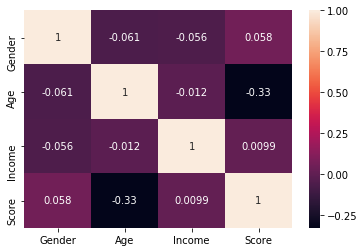

In [7]:
# see visualize corelation matrix
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,fmt=".2g")

* The heat map graph show that the color darkens as the severity of the negative relationship increases and the color turns to cream color as the severity of the positive relationship increases.
* Moreover, ıt could be done in visualization to see the relationship between the data.

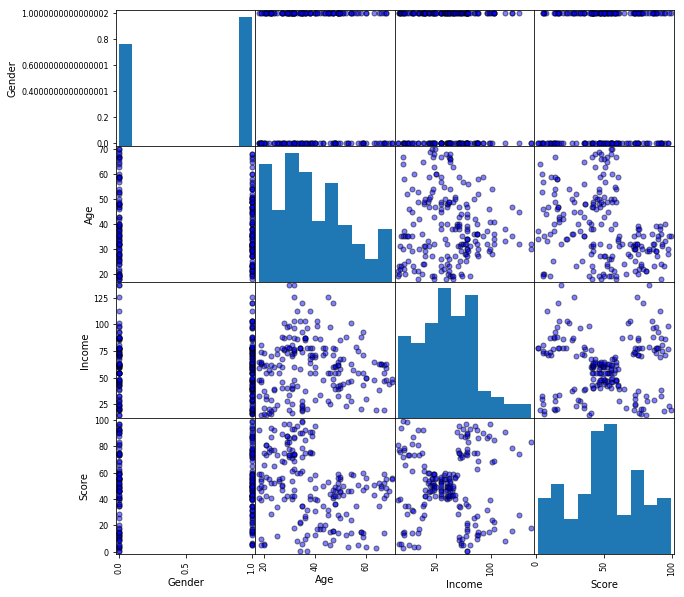

In [8]:

pd.plotting.scatter_matrix(data.loc[:, data.columns != "Exited"],
                                       c="blue",
                                       figsize= [10,10],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 100,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()


* In particular, we observe the relationship between income and score very clearly with the graph.

## KMEANS

* KMeans clustering is an unsupervised learning method.
* KMeans Cluster: 
  * Firstly, the number of cluster is determined.
  * After that, the KMeans method is created with the number of cluster.
  * Finally, the actual data set is compared with the result of the method.
  * KMeans(n_cluster=k) : n_cluster=k means that create k cluster
  
  

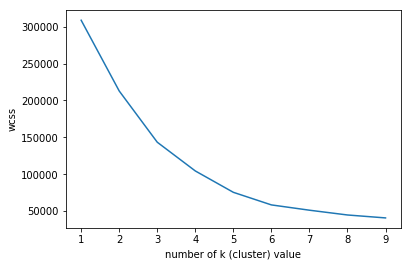

In [9]:
from sklearn.cluster import KMeans
# to find the best number of cluster

wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) 
#kmeans.interia_ is calculate wcss.
plt.plot(range(1,10),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()
    

In [10]:
kmeans2=KMeans(n_clusters=5)
cluster=kmeans2.fit_predict(data)
data["Label"]=cluster

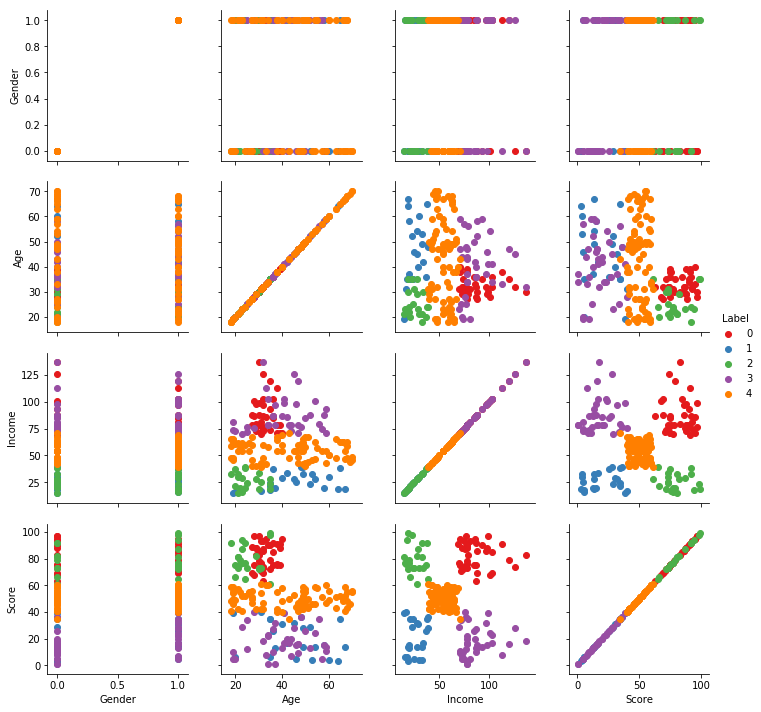

In [11]:
#visualize clustering
data
m=sns.PairGrid(data,hue='Label',vars=['Gender','Age','Income','Score'],palette="Set1")
m = m.map(plt.scatter)
m = m.add_legend()

## Hierarchical Clustering
* One of the unsupervised method is Hierarchical Clustering.
* There are two different versions, Agglomerative and Divisive. We use Agglomerative.
  * Firstly, we''ll find the number of classes with the help of the dendogram.
  * Then we will perform clustering and prediction with the hierarchical clustering method.
 

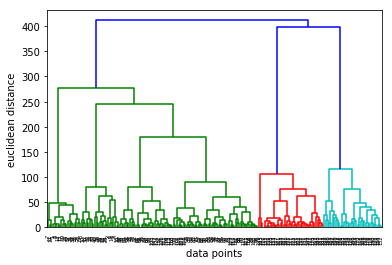

In [12]:
#dendogram
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [13]:
#to copy data
data1 = data.copy(deep=True)

In [14]:
#imported the AgglomerativeClustering 
from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
cluster1 = hiyerartical_cluster.fit_predict(data1)
data1["label"] = cluster1



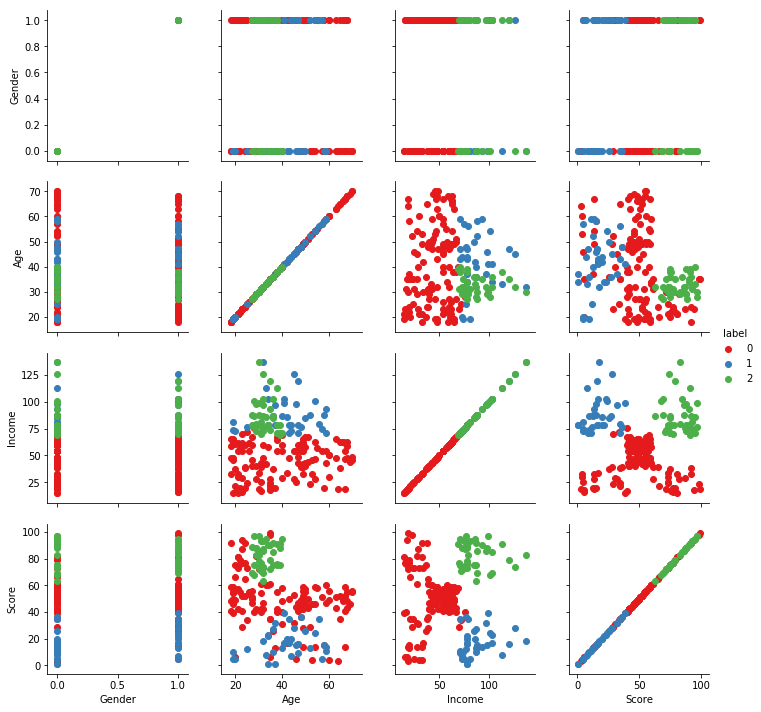

In [15]:
m=sns.PairGrid(data1,hue='label',vars=['Gender','Age','Income','Score'],palette="Set1")
m = m.map(plt.scatter)
m = m.add_legend()

In [16]:
print('K-Means Predicted Data Classes:')
print(data.Label.value_counts())
print('-' * 30)
print('Hierarchical Predicted Data Classes:')
print(data1.label.value_counts())

K-Means Predicted Data Classes:
4    79
0    39
3    37
1    23
2    22
Name: Label, dtype: int64
------------------------------
Hierarchical Predicted Data Classes:
0    126
2     39
1     35
Name: label, dtype: int64
